### Prototype: Statistical Analysis Phase

# Correlations between demographic and socio-economic factors and incidence of Covid 19 infection and mortality in U.S. Counties

#### Objectives
1. Gain a greater understanding of the relationship between race/ethnicity, gender, poverty and severe health conditions and Covid 19 morbidity and mortality.
2. Apply skills recently acquired via Data Science skills to advocacy that addresses health indisparities.

#### Method
From previous step:
1. Source data on race/ethnicity, gender, poverty and severe health conditions and Covid 19 morbidity and mortality at the U.S county level
2. Clean and pre-process data according to unique identifiers

In this step:
3. Conduct exploratory data analysis
4. Test hypothesis that no relationship exists between features using statistical regression (Ordinary Least Squares).
5. Articulate conclusions and next steps for Statistical Analysis Phase.

In the next step:
6. Test hypothesis that features with highest importance are unable to predict Covid 19 morbidity and mortality using machine learning (Random Forest).
7. Visualise findings: a) Highly correlated features and possible Simpsons Paradox; b) outcomes of machine learning.
8. Articulate conclusions and next steps for Machine Learning Phase

### Acknowledgments
- Thanks to my instructors Andrew Worsely, Lydia Peabody, the team at General Assembly and my peers in GA Data Science June-August 2020.
- Julian Hatwell

First step was to create a correlation matrix of the features. All numeric features are log transformed. 

In [1]:
import pandas as pd

all_data_5 = pd.read_csv("data/covid_data_log_200922.csv")

In [2]:
all_data_5.corr()

,FIPS,stateFIPS,countyFIPS_2d,Cases,Deaths,Poverty,Population,W_Male,W_Female,B_Male,B_Female,H_Male,H_Female,I_Male,I_Female,A_Male,A_Female,NH_Male,NH_Female,Risk_Index
FIPS,1.000000,0.999975,0.172145,-0.077418,-0.094983,-0.029532,-0.027460,-0.005085,-0.002671,-0.073047,-0.075860,-0.002073,0.003070,-0.004443,-0.003757,-0.046871,-0.043429,-0.067457,-0.063514,-0.057188
stateFIPS,0.999975,1.000000,0.165240,-0.077401,-0.094913,-0.029016,-0.026971,-0.004482,-0.002082,-0.073395,-0.076283,-0.002343,0.002805,-0.003729,-0.003025,-0.046640,-0.043193,-0.067101,-0.063143,-0.057497
countyFIPS_2d,0.172145,0.165240,1.000000,-0.015464,-0.025916,-0.077585,-0.073370,-0.085662,-0.083333,0.036569,0.046673,0.037572,0.037787,-0.101119,-0.103581,-0.040380,-0.040465,-0.061469,-0.062938,0.033805
Cases,-0.077418,-0.077401,-0.015464,1.000000,0.831404,0.863333,0.870442,0.830109,0.829317,0.855902,0.854359,0.799524,0.797188,0.675372,0.672780,0.821229,0.816102,0.773864,0.768634,-0.147728
Deaths,-0.094983,-0.094913,-0.025916,0.831404,1.000000,0.752192,0.753452,0.707211,0.707504,0.767904,0.777835,0.677542,0.678522,0.567649,0.572033,0.714703,0.710788,0.665688,0.668661,-0.109679
Poverty,-0.029532,-0.029016,-0.077585,0.863333,0.752192,1.000000,0.994726,0.977495,0.977334,0.840801,0.835874,0.857660,0.861540,0.811566,0.812330,0.941105,0.948649,0.893172,0.896652,-0.271954
Population,-0.027460,-0.026971,-0.073370,0.870442,0.753452,0.994726,1.000000,0.983873,0.982604,0.849985,0.840931,0.863760,0.866663,0.816265,0.815136,0.943148,0.950443,0.891949,0.894597,-0.270748
W_Male,-0.005085,-0.004482,-0.085662,0.830109,0.707211,0.977495,0.983873,1.000000,0.998602,0.782062,0.767795,0.853971,0.858309,0.785402,0.782802,0.921671,0.932434,0.873083,0.876733,-0.316735
W_Female,-0.002671,-0.002082,-0.083333,0.829317,0.707504,0.977334,0.982604,0.998602,1.000000,0.778496,0.768960,0.846250,0.853635,0.777178,0.776519,0.916457,0.928951,0.867349,0.872161,-0.306520
B_Male,-0.073047,-0.073395,0.036569,0.855902,0.767904,0.840801,0.849985,0.782062,0.778496,1.000000,0.980966,0.756236,0.741286,0.643079,0.637336,0.817367,0.804058,0.758753,0.758668,-0.036136


In [3]:
all_data_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FIPS           3142 non-null   int64  
 1   stateFIPS      3142 non-null   int64  
 2   countyFIPS_2d  3142 non-null   int64  
 3   County         3142 non-null   object 
 4   State          3142 non-null   object 
 5   Cases          3142 non-null   float64
 6   Deaths         3142 non-null   float64
 7   Poverty        3142 non-null   float64
 8   Population     3142 non-null   float64
 9   W_Male         3142 non-null   float64
 10  W_Female       3142 non-null   float64
 11  B_Male         3142 non-null   float64
 12  B_Female       3142 non-null   float64
 13  H_Male         3142 non-null   float64
 14  H_Female       3142 non-null   float64
 15  I_Male         3142 non-null   float64
 16  I_Female       3142 non-null   float64
 17  A_Male         3142 non-null   float64
 18  A_Female

Next step was to visualise the correlations

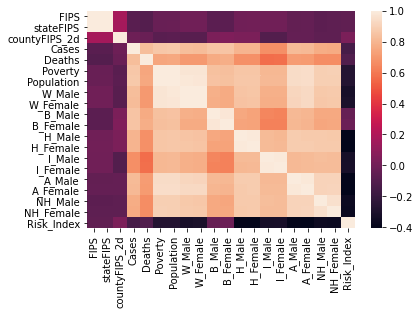

In [4]:
import seaborn as sns
sns.heatmap(all_data_5.corr())

#### Heatmap 1. Feature Correlations

A negative correlation was identified between 'Cases' and 'Risk Index' prompting the need to validate.

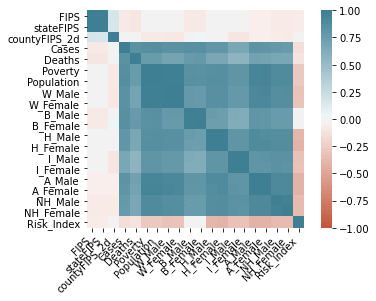

In [5]:
corr = all_data_5.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Heatmap 2. Feature Correlations

A comparison heatmap was made for visual validation purposes.

### Observations for further investigation

1. An inverse relationship between Risk Index and Cases/Deaths seems to be inverse
2. Cases and Deaths seem to be highly correlated
3. Deaths and Black Populations (Male & Female) seem to be highly correlated

Side note: Poverty seems to be perfectly correlated with White Populations (Male & Female), likely due to population.

### Evaluating Distribution of Risk Index Feature

#### Plot 1. x = Risk Index (%; log); y = Cases (log)

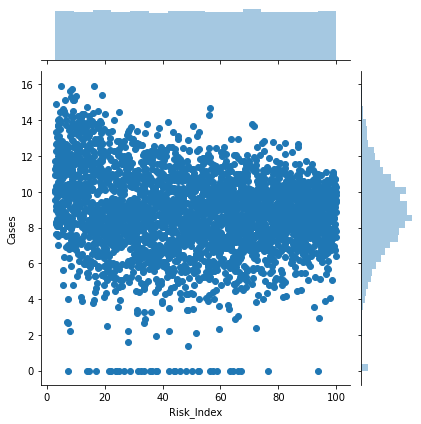

In [6]:
# sns.scatterplot(all_data_5["Risk_Index"], all_data_5["Cases"])

sns.jointplot(all_data_5["Risk_Index"], all_data_5["Cases"], data=all_data_5);


#### Plot 2. x = Risk Index (%; log); y = Deaths (log)

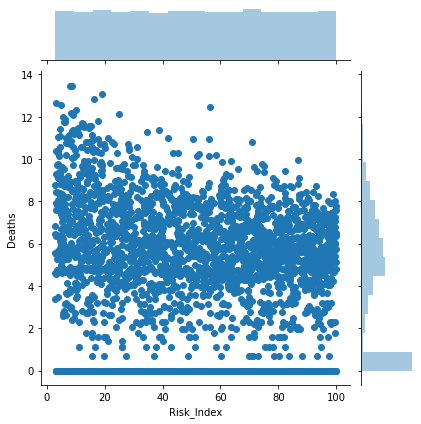

In [7]:
# sns.scatterplot(all_data_5["Risk_Index"], all_data_5["Deaths"])

sns.jointplot(all_data_5["Risk_Index"], all_data_5["Deaths"], data=all_data_5);

#### Plot 3. x = Risk Index (%; log); y = Black Females (log)

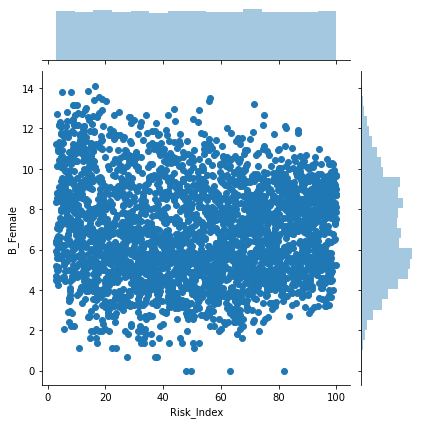

In [8]:
# sns.scatterplot(all_data_5["Risk_Index"], all_data_5["B_Female"])

sns.jointplot(all_data_5["Risk_Index"], all_data_5["B_Female"], data=all_data_5);

#### Plot 4. x = Risk Index (%; log); y = Hispanic Females (log)

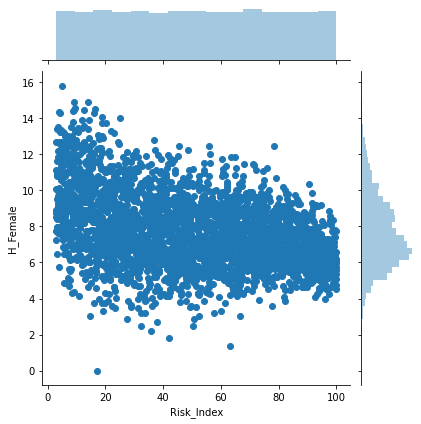

In [10]:
# sns.scatterplot(all_data_5["Risk_Index"], all_data_5["B_Female"])

sns.jointplot(all_data_5["Risk_Index"], all_data_5["H_Female"], data=all_data_5);

#### Plot 5. x = Risk Index (%; log); y = Poverty (log)

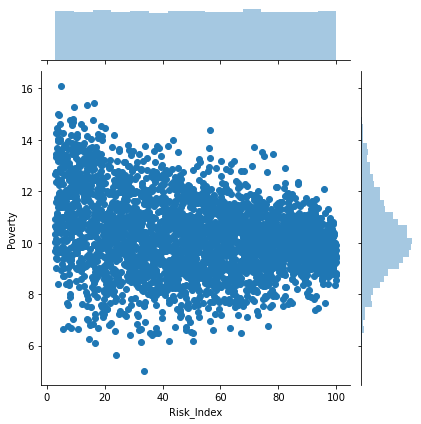

In [11]:
# sns.scatterplot(all_data_5["Risk_Index"], all_data_5["Poverty"])

sns.jointplot(all_data_5["Risk_Index"], all_data_5["Poverty"], data=all_data_5);

#### Histogram 1. x = Risk Index (%; log)

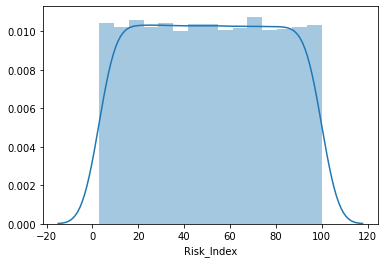

In [12]:
sns.distplot(all_data_5["Risk_Index"]);

In [13]:
all_data_5.loc[:,["Risk_Index"]].describe()

,Risk_Index
count,3142.000000
mean,51.318329
std,28.058961
min,2.850000
25%,27.130000
50%,51.380000
75%,75.470000
max,100.000000


### Evaluating the relationship between Cases and Risk Index

#### OLS Regression (Cases / Risk Index (log) only)

Given the inverse relation between Cases and Risk Index illustrated in Heatmap 1, further investigation into the relationships between the features was required.

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data 
data = pd.read_csv('data/covid_data_log_200922.csv') 
df = pd.DataFrame(data)

# Fit Model & Output Regression Results Summary

# Import Package
import statsmodels.api as sm
from statsmodels.api import add_constant

# Build Model
X = data.loc[:,["Risk_Index"]]
y = data.loc[:,["Cases"]]

X = sm.add_constant(X)
model1 = sm.OLS(y,X)
results = model1.fit()

# MSE of the residuals
print(f"MSE: {results.mse_resid}")

# Output Results
results.summary()

MSE: 5.349518548697812


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Cases   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     70.05
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           8.57e-17
Time:                        14:15:57   Log-Likelihood:                -7091.9
No. Observations:                3142   AIC:                         1.419e+04
Df Residuals:                    3140   BIC:                         1.420e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4457      0.086    109.807      0.000       9.277       9.614
Risk_Index    -0.0123      0.001     -8.370      0.000      -0.015      -0.009
==============================================================================
Omnibus:                      318.381   Durbin-Watson:                   1.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              608.583
Skew:                          -0.668   Prob(JB):                    7.05e-133
Kurtosis:                       4.693   Cond. No.                         122.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
# Define function to output plot of the model coefficients

def coefplot(results):
    '''
    Takes in results of OLS model and returns a plot of 
    the coefficients with 95% confidence intervals.
    
    Removes intercept, so if uncentered will return error.
    '''
    # Create dataframe of results summary 
    coef_df = pd.DataFrame(results.summary().tables[1].data)
    
    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)

    # Set index to variable names 
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)

    # Get errors; (coef - lower bound of conf interval)
    errors = coef_df['coef'] - coef_df['[0.025']
    
    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Drop the constant for plotting
    coef_df = coef_df.drop(['const'])

    # Sort values by coef ascending
    coef_df = coef_df.sort_values(by=['coef'])

    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)
    
    # Add variables column to dataframe
    coef_df['variables'] = variables
    
    # Set sns plot style back to 'poster'
    # This will make bars wide on plot
    sns.set_context("poster")

    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Error bars for 95% confidence interval
    # Can increase capsize to add whiskers
    coef_df.plot(x='variables', y='coef', kind='bar',
                 ax=ax, color='none', fontsize=22, 
                 ecolor='steelblue',capsize=0,
                 yerr='errors', legend=False)
    
    # Set title & labels
    plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
    ax.set_ylabel('Coefficients',fontsize=22)
    ax.set_xlabel('',fontsize=22)
    
    # Coefficients
    ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
               marker='o', s=80, 
               y=coef_df['coef'], color='steelblue')
    
    # Line to define zero on the y-axis
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    
    return plt.show()

#### Coefficient Plot 1. Coefficent Plot Cases / Risk Index (log)

<ipython-input-113-7073bb609ecf>:65: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


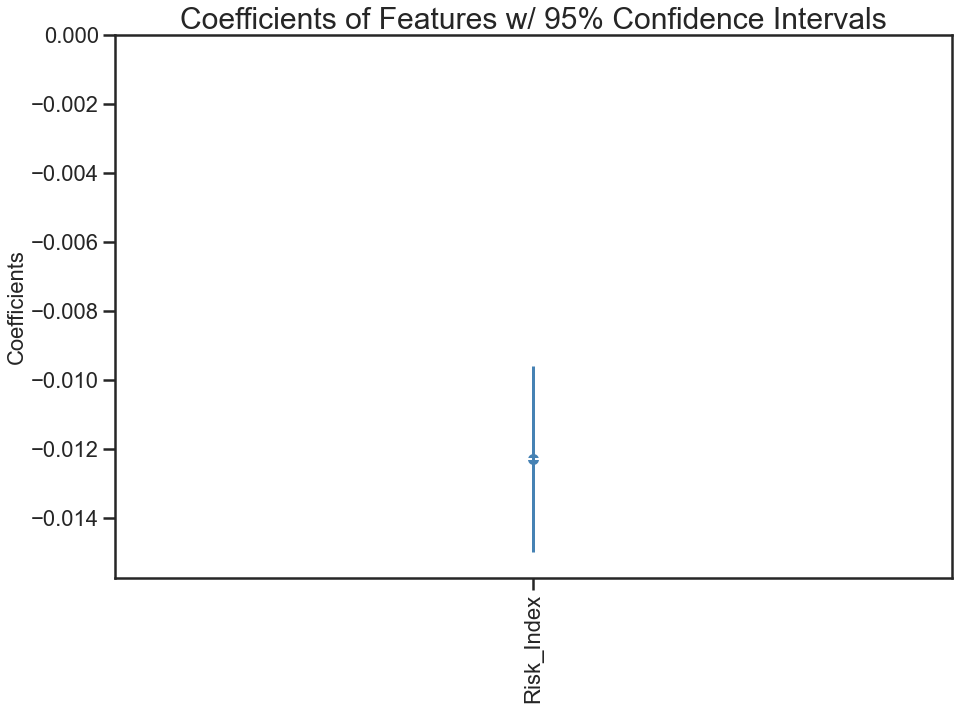

In [114]:
coefplot(results)

### Evaluating Morbidity (Cases)

A series of regressions were run with different feature combinations for evaluation and comparision purposes. Models were compared based on the statistical significance of features, plus AIC and R-Square.

#### Table. Risk Index Data Summary

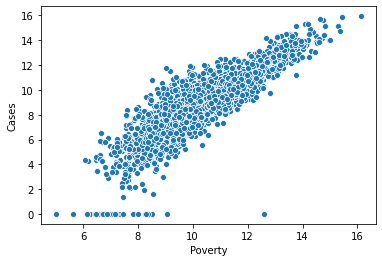

In [21]:
sns.scatterplot(all_data_5["Poverty"], all_data_5["Cases"])

#### Plot 5. x = Poverty (log); y = Cases (log)

#### OLS Regression (Cases / Poverty (log) only)

In [22]:
fit1 = smf.ols("Cases ~ Poverty", data=all_data_5).fit()

fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Cases   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     9190.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:44:17   Log-Likelihood:                -4977.7
No. Observations:                3142   AIC:                             9959.
Df Residuals:                    3140   BIC:                             9971.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0097      0.146    -34.377      0.000      -5.295      -4.724
Poverty        1.3498      0.014     95.867      0.000       1.322       1.377
==============================================================================
Omnibus:                      694.603   Durbin-Watson:                   1.413
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5244.404
Skew:                          -0.843   Prob(JB):                         0.00
Kurtosis:                       9.101   Cond. No.                         72.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: AIC: 9959; R-Squared: 0.745

In [151]:
print(f"MSE: {fit1.mse_resid}")

MSE: 1.3926764860772516


#### Plot 6. Residual analysis: Cases ~ Poverty (log)

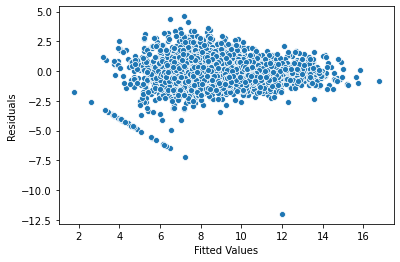

In [23]:
sns.scatterplot(fit1.fittedvalues, fit1.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

#### OLS Regression (All Features (log) Approach)

In [24]:
fit_all = smf.ols("Cases ~ Poverty + Population + W_Male + W_Female + B_Male + B_Female + H_Male + H_Female + I_Male + I_Female + A_Male + A_Female + NH_Male + NH_Female + Risk_Index", data=all_data_5).fit()

fit_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Cases   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     1003.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:44:40   Log-Likelihood:                -4361.1
No. Observations:                3142   AIC:                             8754.
Df Residuals:                    3126   BIC:                             8851.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.7365      0.319    -14.850      0.000      -5.362      -4.111
Poverty       -0.1513      0.121     -1.255      0.209      -0.388       0.085
Population     1.9283      0.177     10.894      0.000       1.581       2.275
W_Male        -0.7152      0.302     -2.369      0.018      -1.307      -0.123
W_Female       0.0315      0.281      0.112      0.911      -0.520       0.583
B_Male         0.0606      0.048      1.259      0.208      -0.034       0.155
B_Female       0.2123      0.045      4.701      0.000       0.124       0.301
H_Male         0.1267      0.091      1.395      0.163      -0.051       0.305
H_Female       0.2439      0.089      2.748      0.006       0.070       0.418
I_Male        -0.0388      0.085     -0.456      0.648      -0.206       0.128
I_Female      -0.1603      0.083     -1.930      0.054      -0.323       0.003
A_Male         0.0749      0.053      1.422      0.155      -0.028       0.178
A_Female      -0.2707      0.057     -4.736      0.000      -0.383      -0.159
NH_Male        0.0544      0.033      1.628      0.104      -0.011       0.120
NH_Female     -0.1439      0.034     -4.242      0.000      -0.210      -0.077
Risk_Index     0.0011      0.001      1.244      0.214      -0.001       0.003
==============================================================================
Omnibus:                      650.946   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4059.916
Skew:                          -0.834   Prob(JB):                         0.00
Kurtosis:                       8.313   Cond. No.                     1.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Note: AIC: 8754; R-Squared: 0.828

In [150]:
print(f"MSE: {fit_all.mse_resid}")

MSE: 0.9447918237324299


#### Plot 7. Residual analysis: All Features (log)

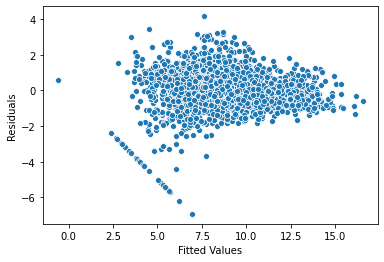

In [25]:
sns.scatterplot(fit_all.fittedvalues, fit_all.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

#### OLS Regression (Cases / White, Black and Hispanic Populations of Males and Females (log) only)

In [26]:
fit_cases_v1 = smf.ols("Cases ~ Poverty + W_Male + W_Female + B_Male + B_Female + H_Male + H_Female", data=all_data_5).fit()

fit_cases_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Cases   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1960.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:45:39   Log-Likelihood:                -4483.7
No. Observations:                3142   AIC:                             8983.
Df Residuals:                    3134   BIC:                             9032.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0975      0.181     -6.053      0.000      -1.453      -0.742
Poverty        0.3579      0.074      4.817      0.000       0.212       0.504
W_Male        -0.3982      0.289     -1.376      0.169      -0.966       0.169
W_Female       0.5477      0.278      1.970      0.049       0.003       1.093
B_Male         0.1971      0.049      4.053      0.000       0.102       0.292
B_Female       0.2479      0.046      5.441      0.000       0.159       0.337
H_Male         0.1455      0.090      1.614      0.107      -0.031       0.322
H_Female       0.0643      0.087      0.737      0.461      -0.107       0.235
==============================================================================
Omnibus:                      706.400   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4213.725
Skew:                          -0.931   Prob(JB):                         0.00
Kurtosis:                       8.359   Cond. No.                         525.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: AIC: 8983.; R-Squared: 0.814

In [149]:
print(f"MSE: {fit_cases_v1.mse_resid}")

MSE: 1.0188701892929721


#### OLS Regression (Cases / Poverty & Black Populations, Male & Female (log) only)

In [30]:
fit_cases_v2a = smf.ols("Cases ~ Poverty + B_Male + B_Female", data=all_data_5).fit()

fit_cases_v2a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Cases   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     4328.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:50:09   Log-Likelihood:                -4555.5
No. Observations:                3142   AIC:                             9119.
Df Residuals:                    3138   BIC:                             9143.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9963      0.161    -12.403      0.000      -2.312      -1.681
Poverty        0.7518      0.023     32.869      0.000       0.707       0.797
B_Male         0.2077      0.042      4.992      0.000       0.126       0.289
B_Female       0.2374      0.039      6.126      0.000       0.161       0.313
==============================================================================
Omnibus:                      685.824   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4469.156
Skew:                          -0.874   Prob(JB):                         0.00
Kurtosis:                       8.575   Cond. No.                         129.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: AIC: 9119; R-Squared: 0.805

In [148]:
print(f"MSE: {fit_cases_v2a.mse_resid}")

MSE: 1.0651906001544527


#### OLS Regression (Cases / Poverty & Hispanic Populations, Male & Female (log) only)

In [29]:
fit_cases_v2b = smf.ols("Cases ~ Poverty + H_Male + H_Female", data=all_data_5).fit()

fit_cases_v2b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Cases   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     3299.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:48:50   Log-Likelihood:                -4889.4
No. Observations:                3142   AIC:                             9787.
Df Residuals:                    3138   BIC:                             9811.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.1417      0.167    -24.861      0.000      -4.468      -3.815
Poverty        1.0637      0.027     39.400      0.000       1.011       1.117
H_Male         0.5136      0.084      6.098      0.000       0.348       0.679
H_Female      -0.2547      0.084     -3.049      0.002      -0.418      -0.091
==============================================================================
Omnibus:                      645.742   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3855.260
Skew:                          -0.840   Prob(JB):                         0.00
Kurtosis:                       8.160   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
print(f"MSE: {fit_cases_v2b.mse_resid}")

MSE: 1.3174295500379798


#### OLS Regression (Cases / Poverty, Female Populations (log) only)

In [31]:
fit_cases_v3 = smf.ols("Cases ~ Poverty + W_Female + B_Female + H_Female + I_Female + A_Female + NH_Female", data=all_data_5).fit()

fit_cases_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Cases   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     2033.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:51:10   Log-Likelihood:                -4437.0
No. Observations:                3142   AIC:                             8890.
Df Residuals:                    3134   BIC:                             8938.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4941      0.286    -12.209      0.000      -4.055      -2.933
Poverty        0.8326      0.085      9.751      0.000       0.665       1.000
W_Female       0.0380      0.065      0.583      0.560      -0.090       0.166
B_Female       0.4012      0.015     26.125      0.000       0.371       0.431
H_Female       0.3368      0.022     15.550      0.000       0.294       0.379
I_Female      -0.0924      0.022     -4.178      0.000      -0.136      -0.049
A_Female      -0.1644      0.030     -5.447      0.000      -0.224      -0.105
NH_Female     -0.1328      0.025     -5.295      0.000      -0.182      -0.084
==============================================================================
Omnibus:                      677.044   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4512.660
Skew:                          -0.854   Prob(JB):                         0.00
Kurtosis:                       8.617   Cond. No.                         335.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: AIC: 8890.; R-Squared: 0.819

In [146]:
print(f"MSE: {fit_cases_v3.mse_resid}")

MSE: 0.989055149849148


#### Plot 6. Linear Regression Plot: Risk Index / Cases (log)

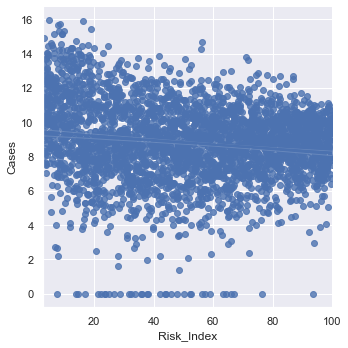

In [32]:
sns.set(color_codes=True)


sns.lmplot(x="Risk_Index", y="Cases", data=all_data_5);

In [33]:
fit_cases_v6 = smf.ols("Cases ~ W_Female + B_Female + H_Female + I_Female + A_Female + NH_Female", data=all_data_5).fit()

fit_cases_v6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Cases   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     2287.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:52:35   Log-Likelihood:                -4484.0
No. Observations:                3142   AIC:                             8982.
Df Residuals:                    3135   BIC:                             9024.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7545      0.227     -7.725      0.000      -2.200      -1.309
W_Female       0.5886      0.033     17.788      0.000       0.524       0.653
B_Female       0.4908      0.012     39.288      0.000       0.466       0.515
H_Female       0.2910      0.021     13.559      0.000       0.249       0.333
I_Female      -0.0170      0.021     -0.807      0.420      -0.058       0.024
A_Female      -0.0904      0.030     -3.050      0.002      -0.149      -0.032
NH_Female     -0.1039      0.025     -4.111      0.000      -0.153      -0.054
==============================================================================
Omnibus:                      592.783   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3639.477
Skew:                          -0.751   Prob(JB):                         0.00
Kurtosis:                       8.054   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: AIC: 8982.; R-Squared: 0.814

In [145]:
print(f"MSE: {fit_cases_v6.mse_resid}")

MSE: 1.0187338614961203


### Conclusion (Morbitity)

After evaluating features combinations across various regression models, the statistical model that evaluated Cases to Risk Index performed best in terms of AIC and R-Squared indicators. However, data from the Cases to Risk Index model revealed an inverse relationship, pointing to a potential Possions Distribution. 

For example, while the data attempts to illustrate the distribution of Covid risk, the distribution of infection is not a constant. Epidemiological factors that determine the spread of infection are beyond the scope of this model.

Further observations include the significance of Covid 19 morbidity in relation to the female population (all races, particulatly non-White) and populations living in poverty.

### Evaluating Mortality (Deaths)

A series of regressions were run with different feature combinations for evaluation and comparision purposes. Models were compared based on the statistical significance of features, plus AIC and R-Square.

#### OLS Regression (Death / Poverty (log) only)

In [34]:
fit_deaths_v1 = smf.ols("Deaths ~ Poverty", data=all_data_5).fit()

fit_deaths_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     4092.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:59:08   Log-Likelihood:                -6837.9
No. Observations:                3142   AIC:                         1.368e+04
Df Residuals:                    3140   BIC:                         1.369e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.4041      0.263    -47.088      0.000     -12.921     -11.888
Poverty        1.6280      0.025     63.965      0.000       1.578       1.678
==============================================================================
Omnibus:                       51.260   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.083
Skew:                          -0.272   Prob(JB):                     2.20e-11
Kurtosis:                       2.719   Cond. No.                         72.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: AIC: 1.368e+04; R-squared: 0.566

#### OLS Regression (Death / Black Populations, Male & Female (log) only)

In [35]:
fit_deaths_v2a = smf.ols("Deaths ~ B_Male + B_Female", data=all_data_5).fit()

fit_deaths_v2a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     2411.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:59:15   Log-Likelihood:                -6686.6
No. Observations:                3142   AIC:                         1.338e+04
Df Residuals:                    3139   BIC:                         1.340e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8996      0.123    -23.524      0.000      -3.141      -2.658
B_Male         0.1801      0.080      2.240      0.025       0.022       0.338
B_Female       0.8562      0.076     11.278      0.000       0.707       1.005
==============================================================================
Omnibus:                       13.838   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.570
Skew:                          -0.141   Prob(JB):                      0.00113
Kurtosis:                       2.846   Cond. No.                         40.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: AIC: 1.338e+04; R-squared: 0.606

In [117]:
print(f"MSE: {fit_deaths_v2a.mse_resid}")

MSE: 4.134351858741209


#### OLS Regression (Death / Black Populations, Male & Female (log) only)

In [36]:
fit_deaths_v2b = smf.ols("Deaths ~ H_Male + H_Female", data=all_data_5).fit()

fit_deaths_v2b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     1345.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:59:53   Log-Likelihood:                -7175.9
No. Observations:                3142   AIC:                         1.436e+04
Df Residuals:                    3139   BIC:                         1.438e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2588      0.178    -23.925      0.000      -4.608      -3.910
H_Male         0.4518      0.174      2.594      0.010       0.110       0.793
H_Female       0.6488      0.171      3.804      0.000       0.314       0.983
==============================================================================
Omnibus:                      149.032   Durbin-Watson:                   1.302
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.608
Skew:                          -0.134   Prob(JB):                     2.09e-15
Kurtosis:                       2.333   Cond. No.                         67.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: AIC: 1.436e+04; R-squared: 0.462

In [116]:
print(f"MSE: {fit_deaths_v2b.mse_resid}")

MSE: 5.645238033271895


#### OLS Regression (Death / Cases & Poverty (log) only)

In [37]:
fit_deaths_v3 = smf.ols("Deaths ~ Cases + Poverty", data=all_data_5).fit()

fit_deaths_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     3591.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:00:22   Log-Likelihood:                -6278.4
No. Observations:                3142   AIC:                         1.256e+04
Df Residuals:                    3139   BIC:                         1.258e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.4473      0.259    -28.789      0.000      -7.954      -6.940
Cases          0.9895      0.027     36.644      0.000       0.937       1.042
Poverty        0.2925      0.042      6.928      0.000       0.210       0.375
==============================================================================
Omnibus:                       57.643   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.707
Skew:                          -0.304   Prob(JB):                     2.42e-14
Kurtosis:                       3.332   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: AIC: 1.256e+04; R-squared: 0.696

In [115]:
print(f"MSE: {fit_deaths_v3.mse_resid}")

MSE: 3.1884064656089373


#### OLS Regression (Death / Cases & Risk Index (log) only)

In [97]:
fit_deaths_v4 = smf.ols("Deaths ~ Cases + Risk_Index", data=all_data_5).fit()

fit_deaths_v4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     3517.
Date:                Wed, 23 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:30:44   Log-Likelihood:                -6301.4
No. Observations:                3142   AIC:                         1.261e+04
Df Residuals:                    3139   BIC:                         1.263e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.9791      0.147    -40.626      0.000      -6.268      -5.691
Cases          1.1537      0.014     83.131      0.000       1.126       1.181
Risk_Index     0.0016      0.001      1.340      0.180      -0.001       0.004
==============================================================================
Omnibus:                       63.223   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.605
Skew:                          -0.236   Prob(JB):                     9.48e-20
Kurtosis:                       3.668   Cond. No.                         271.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: AIC: 1.261e+04; R-squared: 0.691

In [98]:
print(f"MSE: {fit_deaths_v4.mse_resid}")

MSE: 3.235309302808271


### Model 1: Death / Cases, Poverty, Black Populations - Males & Female

### Coefficient Tree (Model 1)

Recalculate OLS summary with MSE metric and X-values as constant

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data 
data = pd.read_csv('data/covid_data_log_200922.csv') 
df = pd.DataFrame(data)

# Fit Model & Output Regression Results Summary

# Import Package
import statsmodels.api as sm
from statsmodels.api import add_constant

# Build Model
X = data.loc[:,["Cases", "Poverty", "B_Male", "B_Female"]]
y = data.loc[:,["Deaths"]]

X = sm.add_constant(X)
model1 = sm.OLS(y,X)
results = model1.fit()

# MSE of the residuals
print(f"MSE: {results.mse_resid}")

# Output Results
results.summary()

MSE: 3.044727454300775


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     1918.
Date:                Wed, 23 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:14:24   Log-Likelihood:                -6205.0
No. Observations:                3142   AIC:                         1.242e+04
Df Residuals:                    3137   BIC:                         1.245e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0509      0.279    -21.710      0.000      -6.597      -5.504
Cases          0.8306      0.030     27.521      0.000       0.771       0.890
Poverty        0.1173      0.045      2.617      0.009       0.029       0.205
B_Male        -0.2563      0.071     -3.628      0.000      -0.395      -0.118
B_Female       0.5266      0.066      7.990      0.000       0.397       0.656
==============================================================================
Omnibus:                       49.966   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.991
Skew:                          -0.308   Prob(JB):                     5.13e-12
Kurtosis:                       3.134   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Coefficient Plot 2. Death / Cases, Poverty, Black Population (Male & Female) (log)

<ipython-input-102-7073bb609ecf>:65: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


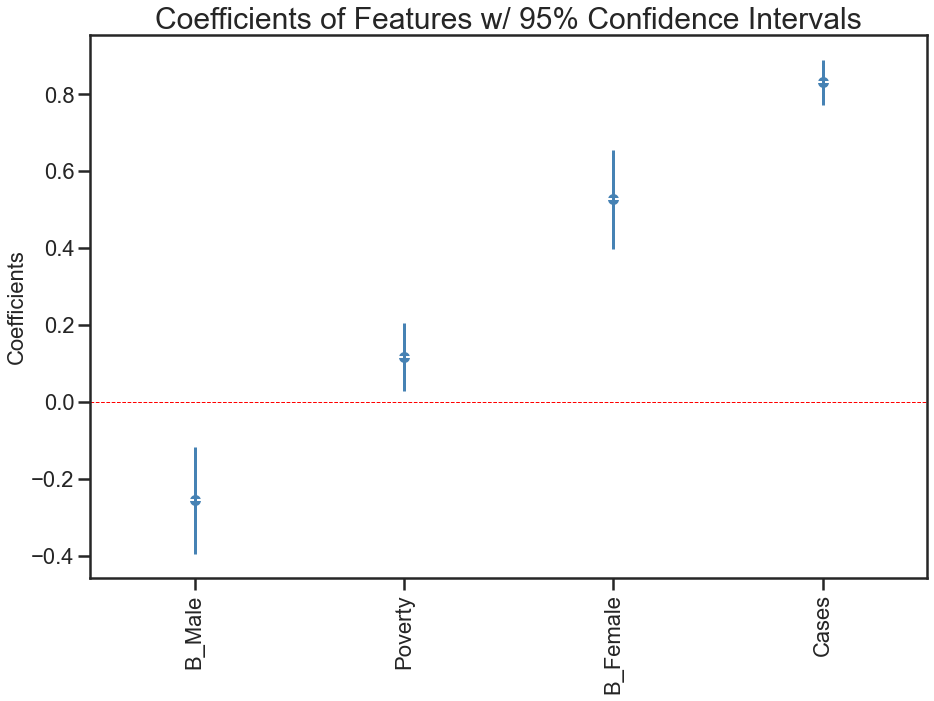

In [103]:
coefplot(results)

/Users/laurindogarcia/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/regressionplots.py:561: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()


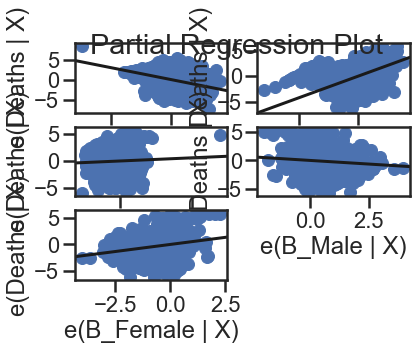

In [99]:
import statsmodels.api as sm

fig = sm.graphics.plot_partregress_grid(results)

### Model 2: Death / Cases, Risk Index, Black Populations - Males & Female

In [143]:
# Fit Model & Output Regression Results Summary

# Import Package
import statsmodels.api as sm
from statsmodels.api import add_constant

# Build Model
X = data.loc[:,["Cases", "Risk_Index", "B_Male", "B_Female"]]
y = data.loc[:,["Deaths"]]

X = sm.add_constant(X)
model2 = sm.OLS(y,X)
results = model2.fit()

# MSE of the residuals
print(f"MSE: {results.mse_resid}")

# Output Results
results.summary()

MSE: 3.0490871144220435


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     1914.
Date:                Wed, 23 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:14:17   Log-Likelihood:                -6207.2
No. Observations:                3142   AIC:                         1.242e+04
Df Residuals:                    3137   BIC:                         1.245e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2769      0.154    -34.197      0.000      -5.580      -4.974
Cases          0.8607      0.027     32.074      0.000       0.808       0.913
Risk_Index    -0.0018      0.001     -1.534      0.125      -0.004       0.000
B_Male        -0.2375      0.070     -3.384      0.001      -0.375      -0.100
B_Female       0.5440      0.066      8.203      0.000       0.414       0.674
==============================================================================
Omnibus:                       47.432   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.297
Skew:                          -0.297   Prob(JB):                     1.97e-11
Kurtosis:                       3.154   Cond. No.                         305.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Coefficient Plot 3. Death / Cases, Risk Index, Black Population (Male & Female) (log)

<ipython-input-102-7073bb609ecf>:65: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


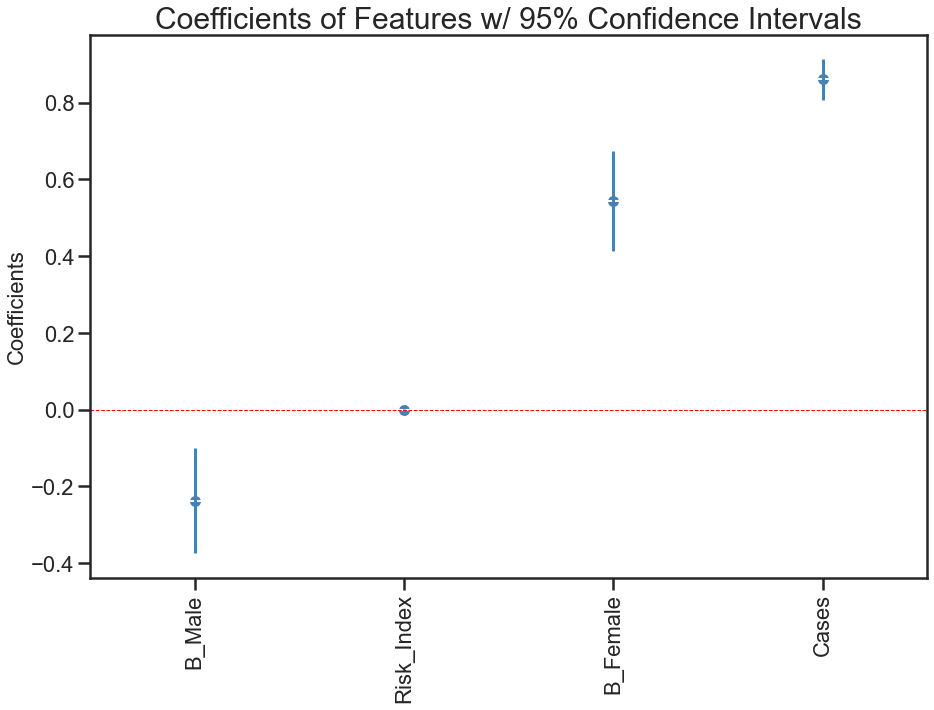

In [105]:
coefplot(results)

### Model 3: Deaths / Females Populations Only

In [142]:
# Fit Model & Output Regression Results Summary

# Import Package
import statsmodels.api as sm
from statsmodels.api import add_constant

# Build Model
X = data.loc[:,["W_Female", "B_Female", "H_Female", "I_Female", "A_Female", "NH_Female"]]
# X = data.loc[:,["W_Female", "B_Female", "H_Female"]]
y = data.loc[:,["Deaths"]]

X = sm.add_constant(X)
model3 = sm.OLS(y,X)
results = model3.fit()

# MSE of the residuals
print(f"MSE: {results.mse_resid}")

# Output Results
results.summary()

MSE: 3.7990450577967323


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     921.3
Date:                Wed, 23 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:14:10   Log-Likelihood:                -6551.7
No. Observations:                3142   AIC:                         1.312e+04
Df Residuals:                    3135   BIC:                         1.316e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6631      0.439    -15.193      0.000      -7.523      -5.803
W_Female       0.4660      0.064      7.293      0.000       0.341       0.591
B_Female       0.7294      0.024     30.235      0.000       0.682       0.777
H_Female       0.2330      0.041      5.621      0.000       0.152       0.314
I_Female      -0.0513      0.041     -1.264      0.206      -0.131       0.028
A_Female      -0.0072      0.057     -0.126      0.899      -0.120       0.105
NH_Female     -0.0675      0.049     -1.384      0.167      -0.163       0.028
==============================================================================
Omnibus:                       23.072   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.706
Skew:                          -0.188   Prob(JB):                     1.17e-05
Kurtosis:                       2.822   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Coefficient Plot 4. Death / Female Populations (all races) (log)

<ipython-input-102-7073bb609ecf>:65: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


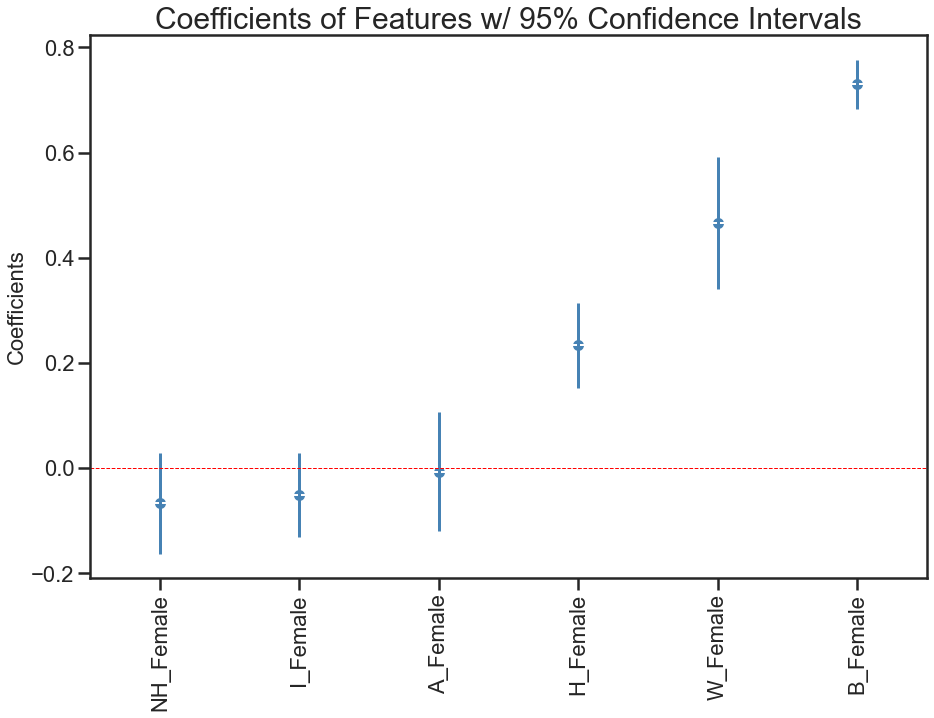

In [111]:
coefplot(results)

### Conclusion (Mortality)

Poverty and Risk Index are virtually interchangable in their statistical significance to Covid 19 Deaths when Covid 19 Morbidity (Cases) and Black Population (Male & Female) are a constant.

While it was unsurprising to see that eliminating the Cases feature from Model 3 (Female Populations, all race) produced a higher MSE score, however the model illustrates inequalities in mortality according to race.

# Next Steps (Statistical Analysis)

1. Add feature to identify counties according to racial, socioeconomic profile of majority populations (i.e. counties with majority black population, majority are persons living in poverty, etc).
2. Add feature illustrating population by age groups.
3. Add transgender population stats once new Census data is available.
4. Add feature to illustrate capacity of health systems.